In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn import preprocessing
from sklearn.ensemble import BaggingRegressor
import math, os, random 
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

In [2]:
# Plot the learning curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5), squeeze=False)

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training times")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    # fit_times_std = np.std(fit_times, axis=1)

    # Plot fit_time vs score
    # axes[0].grid()
    # axes[0].fill_between(fit_times_mean, train_scores_mean - train_scores_std,
    #                      train_scores_mean + train_scores_std, alpha=0.1,
    #                      color="r")
    # axes[0].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
    #                      test_scores_mean + test_scores_std, alpha=0.1,
    #                      color="g")
    axes[0].plot(fit_times_mean, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(fit_times_mean, test_scores_mean, 'o-', color="g",
                 label="Test score")
    axes[0].legend(loc="best")

    return plt


In [3]:
# Load the train data and test data
def load_data():
    
    files = os.listdir("Data")
    filename = files[-1]
    train_data = pd.read_csv("./Data/{}".format(filename),header=None)
    train_output = train_data[len(train_data.columns)-1]
    train_num = train_data.shape[0]
    del train_data[len(train_data.columns)-1]

    file_list = files[:-1]
    test_data = pd.DataFrame()
    for filename in file_list:
        df = pd.read_csv("./Data/{}".format(filename),header=None)
        test_data = pd.concat([test_data, df], axis=0)
    test_output = test_data[len(test_data.columns)-1]
    del test_data[len(test_data.columns)-1]

    data_X = pd.concat([train_data, test_data], axis=0)
    data_Y = pd.concat([train_output, test_output], axis=0)

    return data_X, data_Y, train_num

In [4]:
#  define the models,which are baggings of MLP, KNN, RBF Network, Model Tree(M5P, REF), Linear Regression
def Models():
    # Initialize the models
    linear_reg = LinearRegression()

    regressors = [linear_reg]
    regressor_names = ["Linear Regression"]

    # Bagging of the models
    for index in range(len(regressors)):

        regEnsemble = BaggingRegressor(base_estimator=regressors[index], n_estimators=100, max_samples=1.0, oob_score=False, random_state=0)
        regressors[index] = regEnsemble
        regressor_names[index] += " Ensemble"


    return regressors, regressor_names


In [5]:
def main():
    fig, axes = plt.subplots(1, 1, figsize=(10, 15), squeeze=False)
    
    data_X, data_Y, train_num = load_data()
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimators, estimator_names = Models()
    for estimator, estimator_name in zip(estimators, estimator_names):
        print("******" + estimator_name + "******")
        plot_learning_curve(estimator=estimator, title=estimator_name, X=data_X, y=data_Y, axes=axes[:,0],cv=cv)

    plt.show()

******Linear Regression Ensemble******


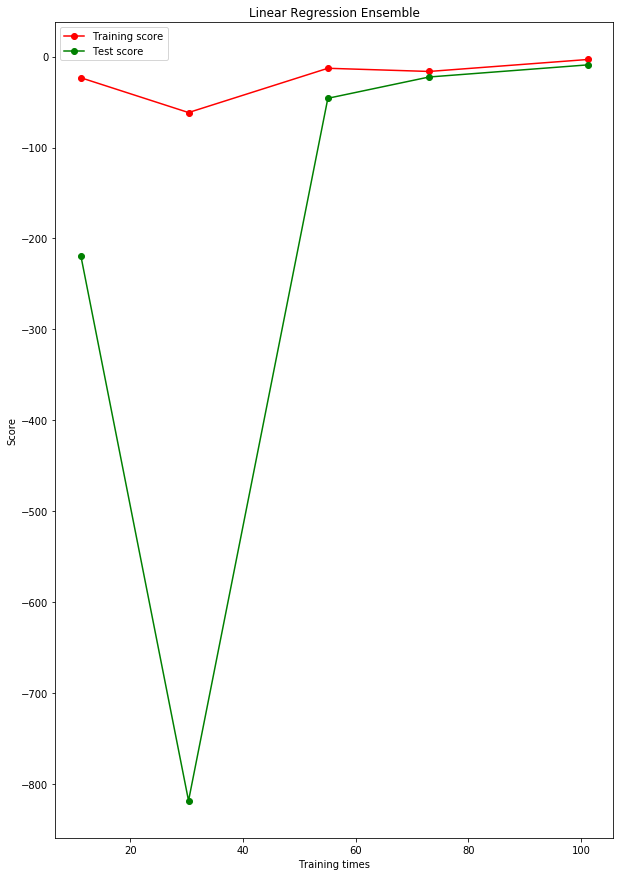

In [6]:

if __name__ == "__main__":
    main()